### Manual implementation of Logistic Regression for Spam Filtering

Saving spambase.data to spambase.data
=> epoch  0: loss= 1.90
=> epoch 100: loss= 1.62
=> epoch 200: loss= 1.41
=> epoch 300: loss= 1.84
=> epoch 400: loss= 1.30
=> epoch 500: loss= 1.11
=> epoch 600: loss= 0.57
=> epoch 700: loss= 0.56
=> epoch 800: loss= 0.25
=> epoch 900: loss= 0.87
=> epoch 1000: loss= 0.71
=> epoch 1100: loss= 0.60
=> epoch 1200: loss= 0.48
=> epoch 1300: loss= 0.80
=> epoch 1400: loss= 0.60
=> epoch 1500: loss= 0.24
=> epoch 1600: loss= 0.49
=> epoch 1700: loss= 0.17
=> epoch 1800: loss= 0.48
=> epoch 1900: loss= 0.17
=> epoch 2000: loss= 0.67
=> epoch 2100: loss= 0.34
=> epoch 2200: loss= 0.28
=> epoch 2300: loss= 0.37
=> epoch 2400: loss= 0.31
=> epoch 2500: loss= 0.28
=> epoch 2600: loss= 0.19
=> epoch 2700: loss= 0.29
=> epoch 2800: loss= 0.24
=> epoch 2900: loss= 0.36
=> epoch 3000: loss= 0.30
=> epoch 3100: loss= 0.27
=> epoch 3200: loss= 0.23
=> epoch 3300: loss= 0.20
=> epoch 3400: loss= 0.29
=> epoch 3500: loss= 0.46
=> epoch 3600: loss= 0.28
=> epoch 37

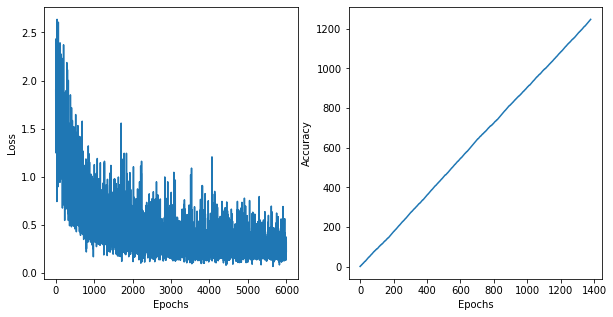

In [2]:
# importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Uploading dataset file
from google.colab import files
files.upload()

# Storing the data from file to a list (Vector)
dataset = np.loadtxt('spambase.data', dtype = 'float32', delimiter = ',')
M = len(dataset[0])-1

# Getting first 57 elements of a list as features
features = dataset[:, :M]
# Getting last element of a list as output of respective email
target = dataset[:, -1]

labels = LabelEncoder().fit_transform(target)
feature_std = StandardScaler().fit_transform(features)

# Splitting data into training and testing data set. ratio is of 70/30
x_train, x_test, y_train, y_test = train_test_split(feature_std, target, test_size=0.3, random_state=0)
x_train_size, feature_size = x_train.shape
x_test_size, target_size = x_test.shape

# implementing logistic regression model
class LogisticRegression(object):
  def __init__(self, num_features):
    self.W = tf.Variable(tf.random.normal(shape=[num_features, 1]))
    self.b = tf.Variable(tf.random.normal(shape=[1,1]))

  def __call__(self, inputs):
    return tf.add(tf.matmul(inputs, self.W), self.b)

  def predict(self,inputs):
    return tf.math.sigmoid(tf.add(tf.matmul(inputs, self.W), self.b))

# computing the logistic loss of the model
def compute_logistic_loss(y_pred, y_true):
  logloss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred)
  return tf.reduce_mean(logloss)

# creating object of the class
model = LogisticRegression(feature_size)

epochs = range(6000)
batch_size = 100
learning_rate = 0.01
acc = 0
loss_history, acc_history = [], []

# training the model
for epoch in epochs:
  rand_index = np.random.choice(x_train_size, size = batch_size)
  X = x_train[rand_index]
  Y = np.transpose([y_train[rand_index]])

  with tf.GradientTape() as tape:
    loss = compute_logistic_loss(model(X), Y)

  dw, db = tape.gradient(loss, [model.W, model.b])

  model.W.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  loss_history.append(loss)

  if epoch % 100 == 0:
    print("=> epoch %2d: loss= %.2f" %(epoch, loss.numpy()))

# checking the accuracy of the model using testing dataset
y_pred_values = model.predict(x_test)
acc = 0

for i in range(x_test_size):
  if y_pred_values[i] >= 0.5:
    y_predicted = 1
  else:
    y_predicted = 0

  eq = tf.cast(tf.equal(y_predicted,y_test[i]), tf.float32)
  acc = acc + eq.numpy()
  acc_history.append(tf.reduce_mean(acc))

print("Accuracy: {:.2f}%".format((acc/x_test_size) * 100))

# plotting the loss as the training epoch increase
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plotting the accuracy of the model using the testing dataset
plt.subplot(1, 2, 2)
plt.plot(acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

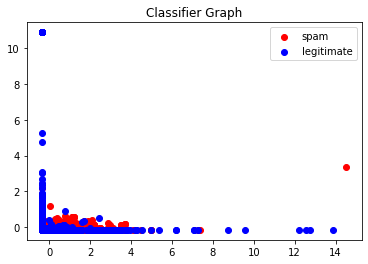

In [3]:
# plotting how classifier marks spam emails and legitimate emails
spam_emails = x_train[y_train == 1]
legitimate_emails = x_train[y_train == 0]
plt.title('Classifier Graph')
plt.scatter(spam_emails[:, 0], spam_emails[:, 1], color="red", label="spam")
plt.scatter(legitimate_emails[:, 0], legitimate_emails[:, 1], color="blue", label="legitimate")
plt.legend()

plt.show()

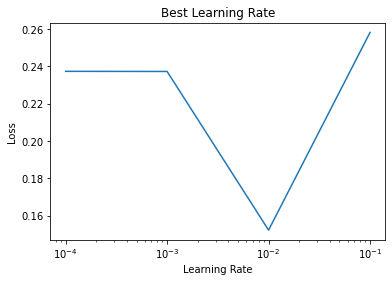

In [5]:
# calculating which learning rate is best 
learning_rates = [0.1, 0.01, 0.001, 0.0001]
losses = []
for lrate in learning_rates:
  learning_rate = lrate
  rand_index = np.random.choice(x_train_size, size = batch_size)
  X = x_train[rand_index]
  Y = np.transpose([y_train[rand_index]])

  with tf.GradientTape() as tape:
    loss = compute_logistic_loss(model(X), Y)

  dw, db = tape.gradient(loss, [model.W, model.b])

  model.W.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  losses.append(loss)

# plotting how to find the best learning rate
plt.plot(learning_rates, losses)
plt.title('Best Learning Rate')
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()